<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 6: *Regression***

###**Tenggat Waktu: 23 November 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 23 November 2024, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam. Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa yang mengerjakan lab menggunakan chatgpt tidak akan dinilai dan otomatis mendapat nilai 0



In [ ]:
# Isi dengan data diri Anda
NAMA = ""
KELAS = ""
NPM = ""
USERNAME_KAGGLE = ""

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya,  dari kelas  dengan NPM , menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   ()


## Intro to Linear Models for Regression

### Linear Regression

Linear regression adalah salah satu metode supervised learning yang bekerja dengan mencari nilai parameter yang paling cocok untuk suatu persamaan linear, yaitu parameter yang menghasilkan error paling minimal. Linear regression menggunakan asumsi bahwa input mempunyai hubungan yang linear dengan target, sehingga model ini akan membuat persamaan garis lurus sebagai fungsi hipotesis.<br>

Contoh persamaan linear

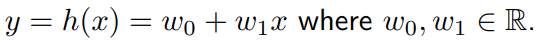

Persamaan di atas adalah fungsi yang memetakan $x$ ke $y$ (dimana $y = h(x)$), dengan:
- $w_0$ adalah _intercept_, titik potong, atau bias
- $w_1$ adalah koefisien
- $x$ adalah nilai independen (input variable)
- $y$ adalah nilai dependen (target variable)

Perhatikan bahwa persamaan tersebut hanya menerima 1 fitur ($x$).

Apabila jumlah fitur pada dataset >1, persamaan bisa digeneralisasikan menjadi sebagai berikut.

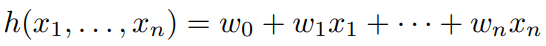

atau

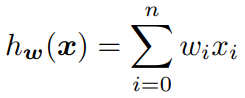

Nilai-nilai parameter seperti $w_0, w_1, w_2, w_n$, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimalkan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression, yang biasa disebut _sum-of-square error function_.

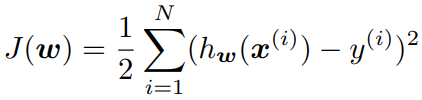

Proses peminimalan nilai loss akan menggunakan algoritma Gradient Descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn menyediakan modul LinearRegression yang siap dipakai untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 1 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 10-5x`. Nilai -3 dan 2, secara berurutan dapat dianggap sebagai nilai $w_0$ dan $w_1$.

In [ ]:
# Membuat data sintesis
import numpy as np
import pandas as pd

X = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
y = 10 - 5 * X

noise = np.array([0.2, -0.1, 0.3, -0.2, 0.1, -0.3, 0.1, -0.2, 0.2, -0.1])
X_train  = X.reshape(-1, 1)
y_train = y + noise

pd.DataFrame({'feature':X, 'target':y_train})

,feature,target
0,2,0.2
1,3,-5.1
2,2,0.3
3,4,-10.2
4,5,-14.9
5,2,-0.3
6,1,5.1
7,5,-15.2
8,5,-14.8
9,1,4.9


In [ ]:
# Melatih model linear regression menggunakan scikit-learn pada training dataset
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [ ]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model
print("Koefisien persamaan linear: \n", linear_model.coef_)
print("Intercept persamaan linear: \n", linear_model.intercept_)

Koefisien persamaan linear: 
 [-5.00833333]
Intercept persamaan linear: 
 10.025000000000006


Berdasarkan parameter tersebut, kita dapat membuat visualisasi dari persamaan yang dihasilkan oleh model

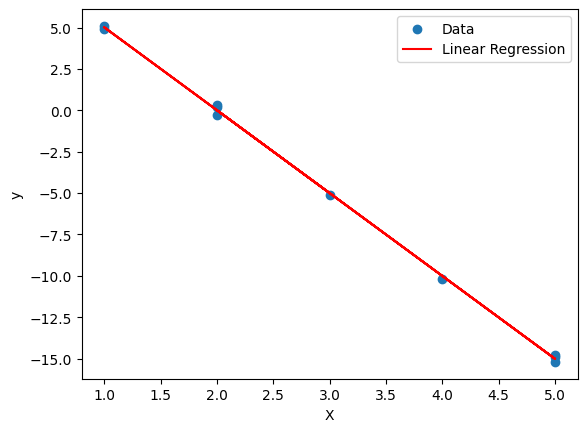

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = linear_model.predict(X_train)

plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

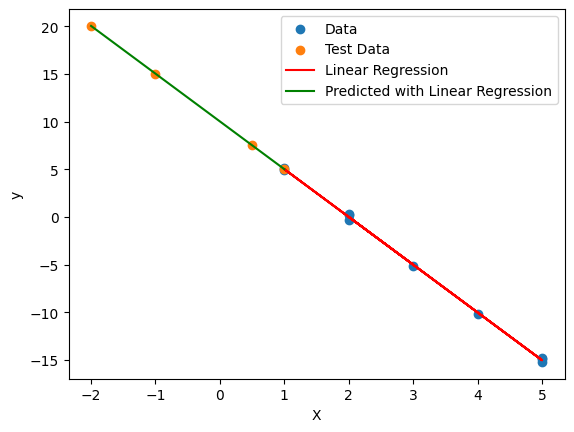

In [ ]:
# Membuat dan memprediksi data test
X_test = np.array([[1],[0.5], [-1], [-2]])
y_test = np.array([5, 7.5, 15, 20])
y_predict = linear_model.predict(X_test)

# Memvisualisasikan hasil prediksi
plt.scatter(X, y_train, label="Data")
plt.scatter(X_test.reshape(-1,1), y_test, label="Test Data")
plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.plot(X_test.reshape(-1,1), y_predict, color='green', label='Predicted with Linear Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Hasil prediksi (`y_predict`) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (`y_test`). Hal ini menandakan model memiliki performa yang baik.

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Berikut adalah kode implementasi dari metrik tersebut.

In [ ]:
from sklearn.metrics import r2_score

print("R-squared:", r2_score(y_test, y_predict))

R-squared: 0.9999749694749694


Dari hasil di atas, dapat diketahui bahwa 99% variasi pada y dapat dijelaskan oleh x pada model regresi. Atau dengan kata lain, perbedaan antara prediksi dan aktual memiliki nilai yang kecil. Untuk implementasi Linear Regression lebih lanjutnya menggunakan **sklearn** dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance karena model yang dihasilkan bersifat linear. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, salah satu teknik yang bisa digunakan adalah regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan pengaruh bobot pada model dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

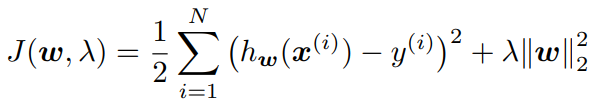

- Lasso Regression

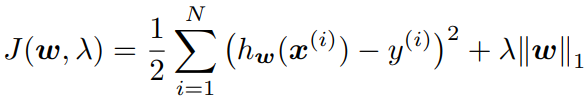

Fungsi loss pada model regularisasi ini hampir sama dengan linear regression biasa, hanya saja ditambahkan term regularisasi di akhir.

Term tambahan pada fungsi loss tersebut berperan seperti bobot penalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

Parameter λ akan menentukan seberapa besar dampak regularisasi pada model yang terbentuk.
- Semakin besar nilai λ menunjukan pengaruh regularization term yang besar pada *loss function* dan berdampak pada nilai bobot ($w$) mengecil sehingga dapat mencegah overfitting
- Semakin kecil nilai λ menunjukan pengaruh regularisasi yang kecil

Ketika nilai λ=0, algoritma yang dilatih sama dengan linear regression biasa tanpa adanya regularisasi.


**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

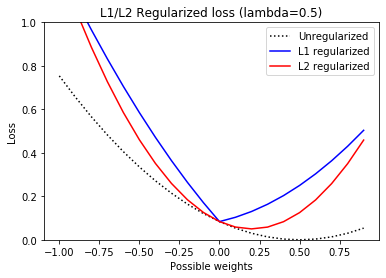

Berikut adalah contoh gambaran dari pengaruh *regularization* terhadap parameter model. Pada saat tidak menggunakan regularisasi, bobot paling optimal adalah 0.5. Regularization membuat pengaruh bobot ($w$) diturunkan. Pada saat tertentu, seperti saat terdapat banyak sekali fitur, hal ini diperlukan untuk mencegah *overfitting* dan meningkatkan kemampuan generalisasi model.

Sumber gambar : [A better visualization of L1 and L2 Regularization](https://medium.com/analytics-vidhya/effects-of-l1-and-l2-regularization-explained-5a916ecf4f06)

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset buatan sebelumnya.

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2)
ridge.fit(X_train, y_train)

print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)

Koefisien persamaan regresi ridge: 
 [-4.62307692]
Intersep persamaan regresi ridge: 
 8.869230769230771


Perhatikan bahwa pengaruh bobot terlihat menurun dibandingkan model *linear regression*. Berdasarkan persamaan linear pada **ridge** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

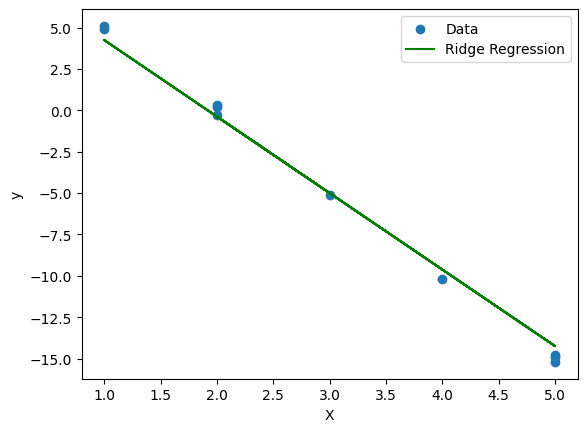

In [ ]:
plt.scatter(X, y_train, label="Data")
y_pred = ridge.predict(X_train)

plt.plot(X, y_pred, color='green', label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Untuk **lasso** regression, berikut adalah contoh implementasinya.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2)
lasso.fit(X_train, y_train)

print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [-4.175]
Intersep persamaan regresi lasso: 
 7.5249999999999995


Juga terjadi penurunan pengaruh bobot pada model. Berdasarkan persamaan linear pada **lasso** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

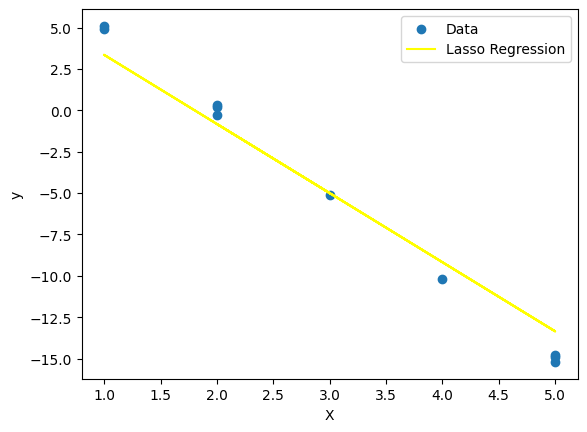

In [ ]:
plt.scatter(X, y_train, label="Data")
y_pred = lasso.predict(X_train)

plt.plot(X, y_pred, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Perhatikan plot visualisasi pada ketiga plot berikut ini. Seperti yang sudah disebutkan sebelumnya, model regresi linear memiliki kecenderungan untuk tidak overfit. Untuk itu, penerapan regularisasi melalui bobot penalti tidak memperbaiki kinerja dari model pada konteks data sederhana yang kita bentuk.

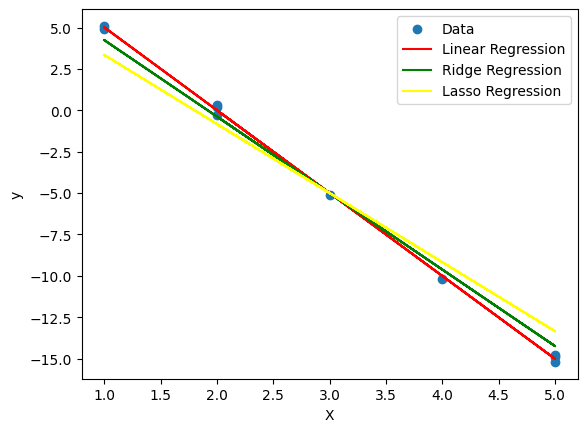

In [ ]:
plt.scatter(X, y_train, label="Data")
y_pred_linear = linear_model.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred_linear, color='red', label="Linear Regression")
plt.plot(X, y_pred_ridge, color='green', label="Ridge Regression")
plt.plot(X, y_pred_lasso, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**NOTE**: Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil. Untuk implementasi lebih lanjutnya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Penjelasan Dataset untuk *Linear Regression*, *Lasso Regression*, dan *Ridge Regression*

Dataset yang digunakan pada bagian linear regression, lasso regression, dan ridge regression adalah data mengenai performa akademik siswa. Dataset ini bertujuan untuk mengidentifikasi faktor yang mempengaruhi performa akademik siswa. Terdapat 10.000 *records* dimana setiap setiap *record* mengandung informasi mengenai berbagai faktor atau *predictors* dan sebauah *performa index*.

- **Hours Studied** : The total number of hours spent studying by each student
- **Previous Scores**: The scores obtained by students in previous tests
- **Extracurricular Activities**: Whether the student participates in extracurricular activities (Yes or No)
- **Sleep Hours**: The average number of hours of sleep the student had per day
- **Sample Question Papers Practiced**: The number of sample question papers the student practiced
- **Performance Index**: A measure of the overall performance of each student.

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

In [ ]:
data_path = '/content/student_performance_v2.csv'

In [ ]:
import pandas as pd

df_student_perf = pd.read_csv(data_path)
df_student_perf.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,2,69,No,8,3.0,45.0
1,5,92,No,5,2.0,77.0
2,1,49,No,8,7.0,26.0
3,8,52,No,9,NaN,45.0
4,8,92,No,9,8.0,88.0


In [ ]:
df_student_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  9049 non-null   float64
 5   Performance Index                 10000 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


#### Soal 1: Data Preprocessing untuk Regresi

a) Persiapkan data untuk dilatih oleh model regresi.
Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training pada model. Berikut adalah persiapan yang `setidaknya` dilakukan sebagai berikut:

- Handle missing values dan duplikat data
- Melakukan encoding pada data kategorikal
- Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing. Gunakan `random_state=42`.
- Melakukan standarisasi pada dataset.

#### Soal 2: Linear Regression

a). Buatlah sebuah model regresi linear menggunakan **salah satu** fitur numerik pada dataset dengan `Performance Index` sebagai target prediksi. Visualisasikan hasil prediksi dengan data test pada fitur tersebut.

**Penjelasan** :

b). Tampilkan metrik evaluasi MAE, MSE, RMSE, dan R-squared untuk hasil prediksi yang sudah dibuat. Lalu lakukan hal yang sama pada model yang dilatih pada **semua** fitur.

c). Visualisasikan kinerja model regresi (yang telah dilatih pada **semua fitur**) pada keseluruhan data uji menggunakan Residuals Plot. Analisis dan berikan insight anda terkait dengan visualisasi tersebut.

**Penjelasan** :

d) Lakukan **cross validation** (jumlah split dibebaskan) pada data latih dan tampilkan nilai R-squared setiap iterasi dan rata-ratanya untuk mendapatkan besaran kinerja sebenarnya dari model.

e). Berdasarkan parameter dari model yang telah dilatih (menggunakan semua kolom/fitur). Lakukan analisis fitur mana yang paling berpengaruh terhadap prediksi `Performance Index`.

**Penjelasan** :

#### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a). Buatlah sebuah list alpha yang berisi minimal 5 bual alpha. Kemudian buatlah (*fit*) model *lasso regression* berdasarkan dataset sebelumnya dan alpha yang telah dipilih.

b). Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model *lasso regression* pada *testing dataset*.

c). Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan. Visualisasikan kinerja model regresi lasso tersebut pada keseluruhan data uji menggunakan Residuals Plot. Analisis dan berikan insight anda terkait dengan visualisasi tersebut.

**Penjelasan** :

d). Berikan analisis terkait hubungan perubahan nilai parameter alpha, parameter model, dan nilai R-squared. Tambahkan kode untuk mendukung jawaban Anda.

**Penjelasan** :

e). Buatlah satu model lasso lagi dengan nilai alpha = 15. Lalu tampilkan koefisien/parameter dari model.

#### Soal 4: Ridge Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a). Buatlah sebuah list alpha yang berisi minimal 5 bual alpha. Kemudian buatlah (*fit*) model *ridge regression* berdasarkan dataset sebelumnya dan alpha yang telah dipilih.

b). Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model *ridge regression* pada *testing dataset*.

c). Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan. Visualisasikan kinerja model regresi lasso tersebut pada keseluruhan data uji menggunakan perbandingan hasil prediksi dan aktual atau Prediction Error Plot. Analisis dan berikan insight anda terkait dengan visualisasi tersebut.

**Penjelasan** :

d). Buatlah model ridge dengan nilai alpha yang sangat besar, misalnya aplha = 10000. Bandingkan hasil yang didapat dengan nomor 3e. Berdasarkan perbandingan tersebut, jelaskan perbedaan karakteristik antara model Lasso dan Ridge. Sertakan **sumber** anda.

**Penjelasan** :

e). Model manakah yang dapat digunakan untuk *feature selection*? berikan alasan secara singkat!

**Penjelasan** :

## Intro to Linear Models for Classification

### Logistic Regression

Logistic regression adalah model linear yang hampir mirip dengan linear regression. Namun, alih-alih memprediksi nilai kontinu, logistic regression hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor, atau lebih tepatnya binary classifier. Contoh visualisasinya adalah sebagai berikut.

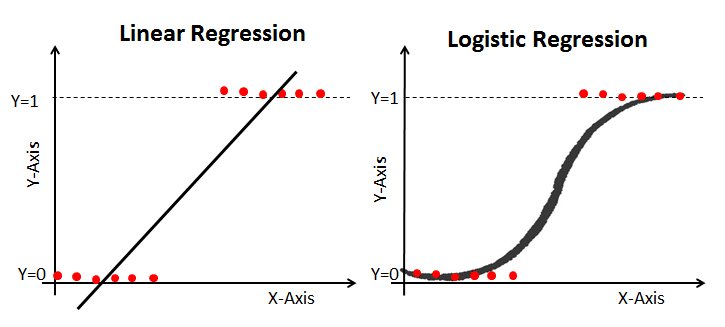

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

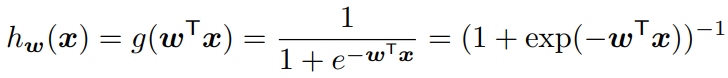

Model logistic regression memanfaatkan fungsi sigmoid $g=\frac{1}{1+e^{-z}}$ untuk mentransformasi hasil perkalian $z=w^Tx$ yang merupakan persamaan linear menjadi rentang 0-1. Output dari fungsi sigmoid mencerminkan peluang suatu data diklasifikasi sebagai kelas 1. Untuk mengubah bentuk peluang menjadi kelas, diperlukan threshold yang membatasi penentuan kelas sesuai dengan keperluan dari dataset (tidak mesti 0.5). Pemilihan threshold ini dapat dipilih menggunakan berbagai metode, salah satunya dengan ROC Curve, yang dapat Anda dalami lebih lanjut melalui slide.

![Logistic regression threshold](https://miro.medium.com/v2/resize:fit:483/0*KZu2_AY6Oxr86dWd.png)

Sumber gambar: https://morihosseini.medium.com/mastering-logistic-regression-thresholds-b34fe07f09f5

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, tidak seperti linear regression yang meminimalkan perbedaan hasil prediksi, di sini logistic regression memaksimalkan kesamaan hasil prediksi dengan data aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa Anda pelajari sendiri dari slide). Berikut adalah persamaan likelihood yang ingin dimaksimalkan tersebut.

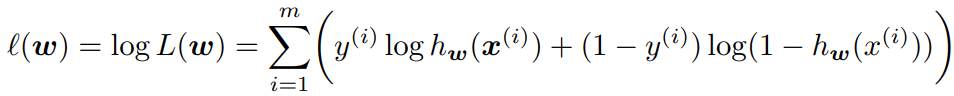

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0 atau 1.

In [ ]:
# Membentuk data buatan
x1  = np.array([6, 9, 4, 6, 8, 4, 6, 2, 9, 2, 7, 6])
x2  = np.array([8, 7, 3, 5, 9, 6, 7, 5, 9, 3, 8, 2])

X_train = np.stack((x1, x2), axis=1)
y_logistic_train   = np.where((x1 > 5) & (x2 > 5), 1, 0)

print('X: ', X_train)
print('y: ', y_logistic_train)

X:  [[6 8]
 [9 7]
 [4 3]
 [6 5]
 [8 9]
 [4 6]
 [6 7]
 [2 5]
 [9 9]
 [2 3]
 [7 8]
 [6 2]]
y:  [1 1 0 0 1 0 1 0 1 0 1 0]


In [ ]:
# Melatih logistic regression pada training set
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [ ]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan
X_test = np.array([[8, 5], [3, 6]])
y_test = np.array([0, 0])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[1 0]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. Kita dapat menggambar garis *decision boundary* berdasarkan koefisien dan *intercept* dari model.

In [ ]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2
weights = [logistic.intercept_[0],logistic.coef_[0,0], logistic.coef_[0,1]]
print(weights)

[-10.603683288607654, 0.7075177877076285, 1.0549551066824836]


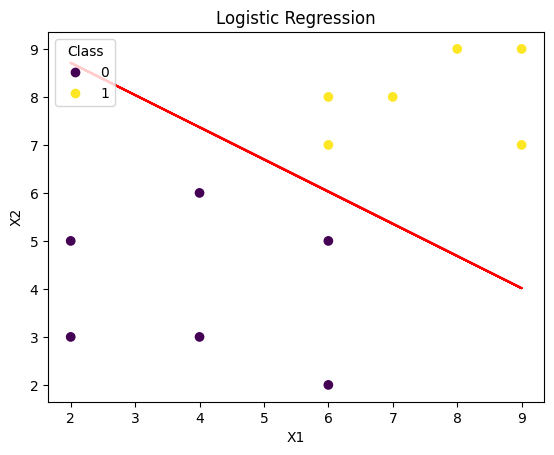

In [ ]:
# Plotting the decision boundary
x2_test = (-weights[0] - (weights[1] * x1)) / weights[2]
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_logistic_train, cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2_test, color='red', label='Decision Boundary')
plt.show()

Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [ ]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Penjelasan Dataset untuk *Logistic Regression*

Dataset yang digunakan pada bagian ini adalah data terkait *loan approval*. Model yang akan dibuat akan memprediksi apakah pinjaman akan diterima atau tidak. Berikut adalah kolom-kolom yang ada pada dataset.

- person_age : Age of the person
- person_income : Annual Income
- person_emp_exp : Years of employment experience
- loan_amnt : Loan amount requested
- loan_int_rate : Loan interest rate
- loan_percent_income : Loan amount as a percentage of annual income
- cb_person_cred_hist_length : 	Length of credit history in years
- credit_score : Credit score of the person
- loan_status (target) : Loan approval status (approved or rejected)

Sumber data dan penjelasan : https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

In [ ]:
df_loan = pd.read_csv('/content/loan_data_v2.csv')
df_loan.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,Approved
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,Rejected
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,Approved
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,Approved
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,Approved


In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45002 entries, 0 to 45001
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  43652 non-null  float64
 1   person_income               45002 non-null  float64
 2   person_emp_exp              45002 non-null  int64  
 3   loan_amnt                   45002 non-null  float64
 4   loan_int_rate               45002 non-null  float64
 5   loan_percent_income         45002 non-null  float64
 6   cb_person_cred_hist_length  45002 non-null  float64
 7   credit_score                45002 non-null  int64  
 8   loan_status                 45002 non-null  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 3.1+ MB


#### Soal 5: Logistic Regression

a). Lakukan *data preprocessing* pada dataframe meliputi pengecekan dan penanganan *missing values*, data duplikat, dan *encoding* pada kolom kategorikal. Terakhir, lakukan pembagian dataset menjadi training dan testing dengan ukuran training 80% dan testing 20%. Gunakan `random_state=42` untuk *splitting*.

b) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set. Hasil evaluasi mencakup Akurasi, F1-Score, Precision, dan Recall.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

c). Lakukan standarisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

d). Buatlah suatu model logistic regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set. Hasil evaluasi mencakup Akurasi, F1-Score, Precision, Recall.

e) Dari kedua model yang dibangun dengan data yang distandarisasi dan data yang tidak distandarisasi, Apakah terdapat perbedaan performa? Berikan analisis Anda terkait penyebab hal tersebut dan sertakan **sumber** anda!

**Penjelasan** :

f). Berdasarkan parameter dari model yang telah dilatih, Identifikasilah fitur-fitur penting atau paling berpengaruh! Tampilkan tingkat kepentingan fitur dalam bentuk grafik!

### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

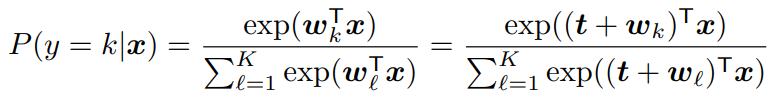

Persamaan likelihood softmaxe regression:

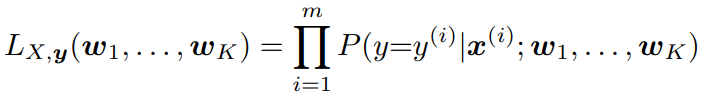

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0, 1, dan 2.

In [ ]:
# Membentuk data buatan
x1  = np.array([2, 7, 5, 2, 1, 7, 5, 7, 2, 3])
x2  = np.array([2, 3, 5, 6, 3, 4, 3, 6, 3, 6])

X_train = np.stack((x1, x2), axis=1)
y_softmax_train   = np.array([2, 1, 1, 0, 2, 1, 1, 1, 2, 0])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[2 2]
 [7 3]
 [5 5]
 [2 6]
 [1 3]
 [7 4]
 [5 3]
 [7 6]
 [2 3]
 [3 6]]
y:  [2 1 1 0 2 1 1 1 2 0]


In [ ]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set
softmax = LogisticRegression(multi_class='multinomial')

softmax.fit(X_train, y_softmax_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [ ]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan
X_test = np.array([[2, 3], [7, 5]])
y_softmax_test = np.array([2, 1])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

[2 1]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. w0, w1, dan w2 yang dihasilkan masing-masing memiliki 3 nilai yang merepresentasikan tiap boundary.

In [ ]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
print(softmax.intercept_, softmax.coef_)

[-2.36252396 -2.42153382  4.78405778] [[-0.34320252  0.78759569]
 [ 0.94539106 -0.11971496]
 [-0.60218853 -0.66788073]]


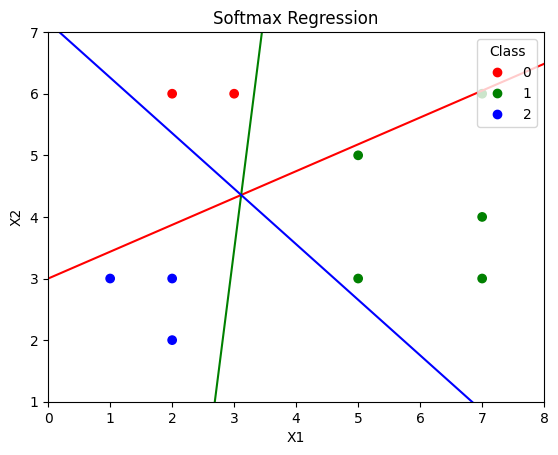

In [ ]:
# Plotting decision boundary
import matplotlib

x1_line = np.array([x1.min() - 1, x1.max() + 1])
boundary_0 = (-softmax.intercept_[0] - (softmax.coef_[0][0] * x1_line)) / softmax.coef_[0][1]
boundary_1 = (-softmax.intercept_[1] - (softmax.coef_[1][0] * x1_line)) / softmax.coef_[1][1]
boundary_2 = (-softmax.intercept_[2] - (softmax.coef_[2][0] * x1_line)) / softmax.coef_[2][1]

fig, ax = plt.subplots()
plt.title('Softmax Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_softmax_train, cmap=matplotlib.colors.ListedColormap(["red", "green", "blue"]))
plt.legend(*scatter.legend_elements(),
           loc = 'upper right',
           title = 'Class')
plt.plot(x1_line, boundary_0, color='red')
plt.plot(x1_line, boundary_1, color='green')
plt.plot(x1_line, boundary_2, color='blue')
ax.set_xlim([x1.min() - 1, x1.max() + 1])
ax.set_ylim([x2.min() - 1, x2.max() + 1])
plt.show()

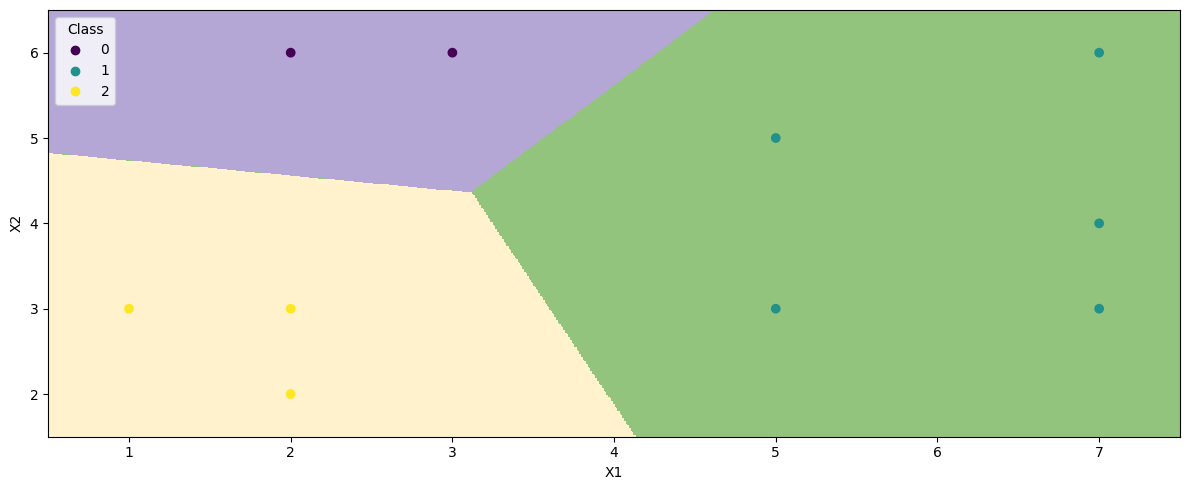

In [ ]:
# Plotting decision boundary dengan contour plot
x1_mesh, x2_mesh = np.meshgrid(
    np.linspace(x1.min() - 0.5, x1.max() + 0.5, 500).reshape(-1, 1),
    np.linspace(x2.min() - 0.5, x2.max() + 0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred = softmax.predict(X_new)
zz = y_pred.reshape(x1_mesh.shape)

plt.figure(figsize=(12, 5))
plt.contourf(x1_mesh, x2_mesh, zz, cmap=matplotlib.colors.ListedColormap(['#b4a7d6','#93c47d','#fff2cc']))
scatter = plt.scatter(x1, x2, c=y_softmax_train)
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model berhasil memprediksi benar pada semua (2 buah) data uji. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 1.

In [ ]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_softmax_test))

Nilai rata-rata akurasi: 1.0


### Penjelasan Dataset untuk Softmax Regression

Dataset yang digunakan pada bagian softmax regression adalah data terkait klasifikasi jenis perilaku pengguna *smartphones*. Berikut penjelasan masing-masing kolom pada data.

- User ID: Unique identifier for each user.
- Device Model: Model of the user's smartphone.
Operating System: The OS of the device (iOS or Android).
- App Usage Time: Daily time spent on mobile applications, measured in minutes.
- Screen On Time: Average hours per day the screen is active.
- Battery Drain: Daily battery consumption in mAh.
- Number of Apps Installed: Total apps available on the device.
- Data Usage: Daily mobile data consumption in megabytes.
- Age: Age of the user.
- Gender: Gender of the user (Male or Female).
- User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).

Sumber data dan penjelasan: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

In [ ]:
data_path = '/content/user_behavior_dataset.csv'
df_user = pd.read_csv(data_path)

df_user.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


#### Soal 6: Softmax Regression

a). Buang kolom yang tidak diperlukan (`ID`) dan lakukan One Hot Encoding pada fitur kategorikal. Lalu, bagi dataset menjadi training dan testing dengan rasio 80:20. Gunakan `random_state=42`.

b). Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

c). Buatlah suatu model softmax regression berdasarkan data yang telah dinormalisasi serta tampilkan nilai intercept dan koefisien untuk setiap kelas output yang dilatih.

d). Tampilkan confusion matrix dan hasil metrik evaluasi pada testing dataset. Hasil evaluasi metriknya mencakup:
* F1 Macro Average
* F1 Micro Average
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

e) Dari parameter model yang telah dibuat, fitur-fitur mana sajakah yang berpengaruh dalam meningkatkan kemungkinan suatu data termasuk ke kelas 2 (`User Behaviour Class` = 2).

**Penjelasan** :

f). Jelaskan pengaruh **langsung** dilakukannya standarisasi pada model linear! Sertakan **sumber** anda!

**Penjelasan** :

## Kompetisi Kaggle Regresi Berdasarkan Linear Models

Dalam rangka menerapkan pemahaman kalian pada materi model linear untuk kasus regresi, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 6 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi. Anda dapat mengunduh dataset yang digunakan dari halaman kompetisi tersebut.
*   Kerjakan solusi Anda menggunakan notebook ini. Anda dibebaskan untuk menambahkan cell code dan markdown sesuai kebutuhan.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.
*   Full score untuk score diatas benchmark

**Tautan Kaggle Competition**
*   [Kaggle Competition Linear Model for Regression](https://www.kaggle.com/t/b3ebe1bf9db2574bbc04efcd8f7318e5)